<a href="https://colab.research.google.com/github/srimaailuri/Machine_learning/blob/logitstic_reg/logistic_regression%5Cdiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dataset=pd.read_csv('/content/sample_data/diabetes2.csv');

In [7]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
import seaborn as sns

[0.10956573 0.23470834 0.09673289 0.07962658 0.07552156 0.13970524
 0.11976088 0.14437878]


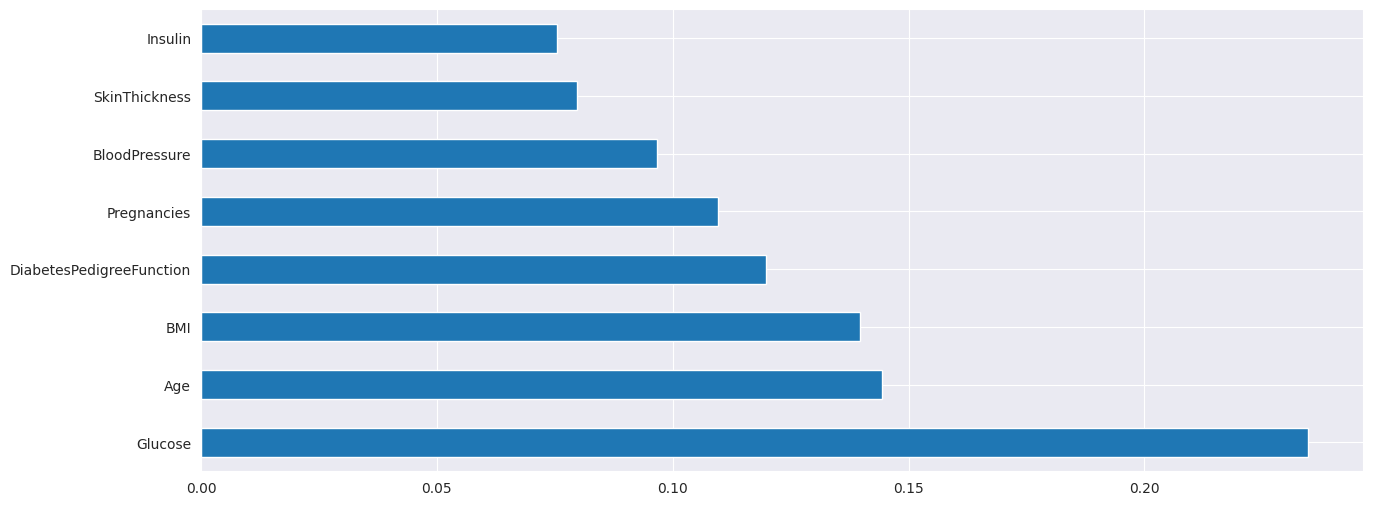

In [9]:
plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")

x = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [12]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred=model.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_pred,y_test)

0.8229166666666666

In [22]:
gk=dataset.groupby([dataset['Outcome']])

In [23]:
outcome_positive=gk.get_group(1)

In [18]:
dataset.Age.min(),dataset.Age.max()

(21, 81)

In [19]:
Labels=['21-31 years','31-41 years','41-51 years','51-61 years','61-71 years','71-81 years']

In [21]:
dataset['Age_in_yrs']=pd.cut(dataset['Age'],bins=[21,31,41,51,61,71,81],labels=Labels)

<Axes: >

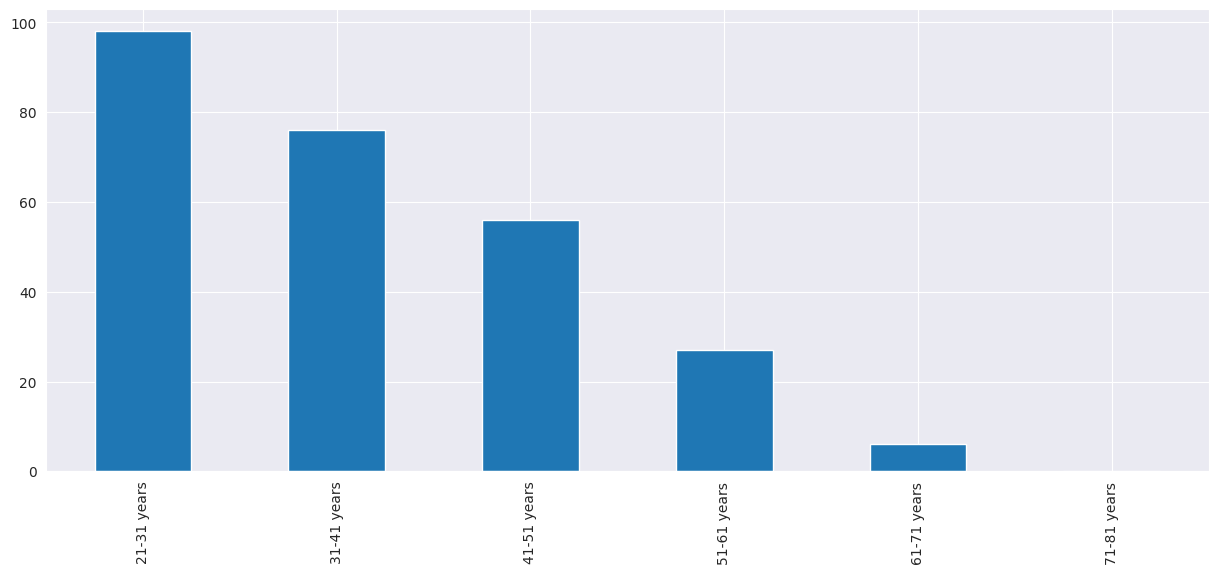

In [28]:
outcome_positive['Age_in_yrs'].value_counts().plot(kind='bar')

 ***children in their 20's are more likely to suffer to diabetes***


In [30]:
dataset[['BMI','Outcome']].value_counts().plot(kind='histogram')

ValueError: ignored